In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
import warnings 
warnings.filterwarnings("ignore")

In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [6]:
from pmdarima import auto_arima

In [7]:
df = pd.read_csv("../../Data/co2_mm_mlo.csv")

In [8]:
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [10]:
df['Date'] = pd.to_datetime({'year':df['year'], 'month' : df['month'], 'day': 1})

In [11]:
df.head()

,year,month,decimal_date,average,interpolated,Date
0,1958,3,1958.208,315.71,315.71,1958-03-01
1,1958,4,1958.292,317.45,317.45,1958-04-01
2,1958,5,1958.375,317.50,317.50,1958-05-01
3,1958,6,1958.458,NaN,317.10,1958-06-01
4,1958,7,1958.542,315.86,315.86,1958-07-01


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   year          729 non-null    int64         
 1   month         729 non-null    int64         
 2   decimal_date  729 non-null    float64       
 3   average       722 non-null    float64       
 4   interpolated  729 non-null    float64       
 5   Date          729 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 34.3 KB


In [16]:
df = df.set_index('Date')

In [17]:
df.head()

,year,month,decimal_date,average,interpolated
Date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


In [18]:
df.index.freq = 'MS'

In [19]:
df.head()

,year,month,decimal_date,average,interpolated
Date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


In [20]:
# average value is missing some values so interpolated column is considered which is calculated by using values above and below

<Axes: xlabel='Date'>

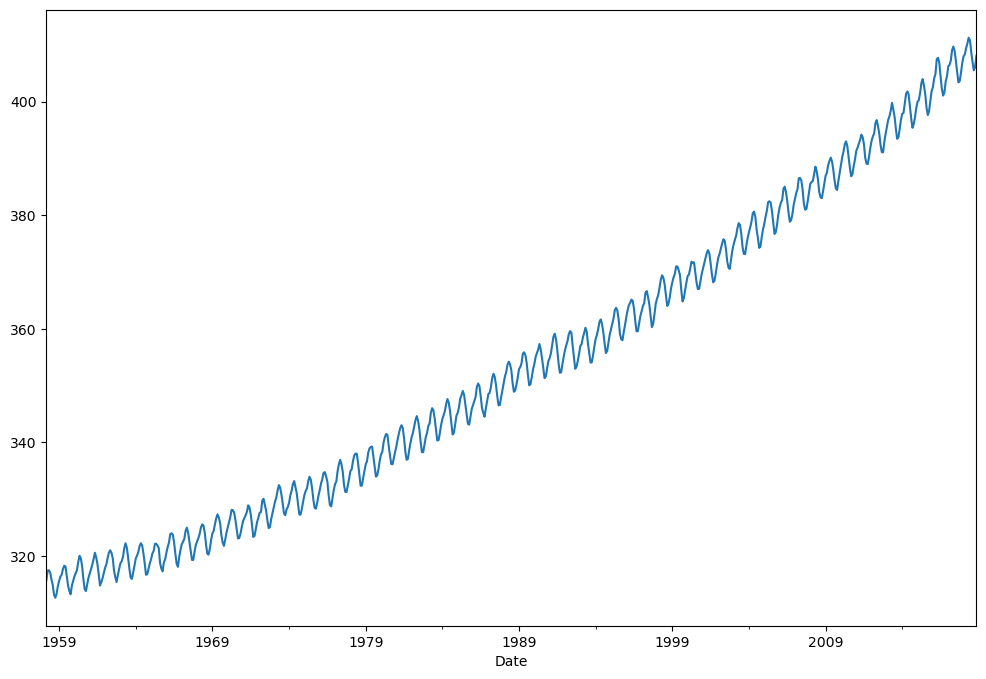

In [22]:
df['interpolated'].plot(figsize = (12,8))

In [23]:
## clear seasonality and tred

In [25]:
result = seasonal_decompose(df['interpolated'], model= 'add')

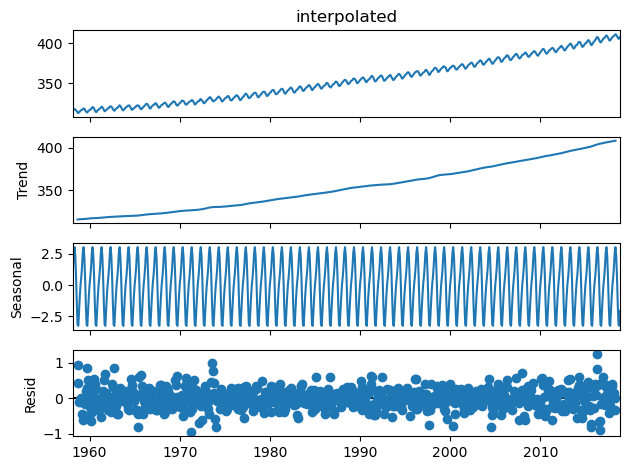

In [27]:
result.plot();

<Axes: xlabel='Date'>

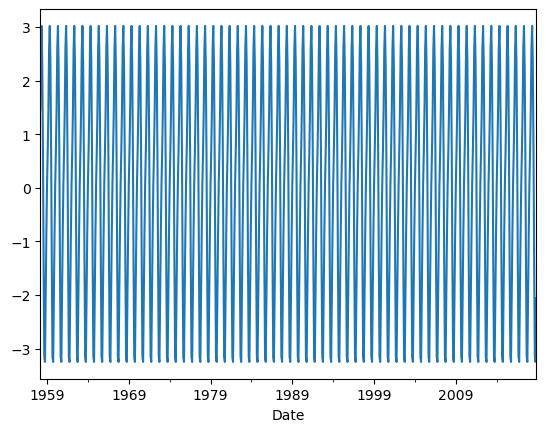

In [28]:
result.seasonal.plot()

In [29]:
auto_arima(df['interpolated'], seasonal = True,  m = 12).summary()
#m = 12  observe the plot and estimate where the pattern in the plot repeats itself 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -206.251
Date:                            Tue, 24 Sep 2024   AIC                            424.503
Time:                                    00:14:18   BIC                            452.044
Sample:                                03-01-1958   HQIC                           435.130
                                     - 11-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3519      0.067      5.284      0.000       0.221       0.482
ar.L2          0.0878      0.034      2.567      0.010       0.021       0.155
ma.L1         -0.7071      0.058    -12.229      0.000      -0.820      -0.594
ar.S.L12       0.9996      0.000   3065.761      0.000       0.999       1.000
ma.S.L12      -0.8670      0.021    -40.782      0.000      -0.909      -0.825
sigma2         0.0957      0.005     20.397      0.000       0.086       0.105
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 4.50
Prob(Q):                              0.79   Prob(JB):                         0.11
Heteroskedasticity (H):               1.13   Skew:                            -0.00
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
len(df)

729

In [31]:
train = df.iloc[:717]

In [32]:
test = df.iloc[717:]

In [33]:
model = SARIMAX(df['interpolated'], order = (2,1,1) , seasonal_order = (1,0,1,12))

In [34]:
results = model.fit()

C:\Users\thaku\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [35]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  729
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -206.251
Date:                            Tue, 24 Sep 2024   AIC                            424.503
Time:                                    00:24:10   BIC                            452.044
Sample:                                03-01-1958   HQIC                           435.130
                                     - 11-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3519      0.067      5.284      0.000       0.221       0.482
ar.L2          0.0878      0.034      2.567      0.010       0.021       0.155
ma.L1         -0.7071      0.058    -12.229      0.000      -0.820      -0.594
ar.S.L12       0.9996      0.000   3065.761      0.000       0.999       1.000
ma.S.L12      -0.8670      0.021    -40.782      0.000      -0.909      -0.825
sigma2         0.0957      0.005     20.397      0.000       0.086       0.105
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 4.50
Prob(Q):                              0.79   Prob(JB):                         0.11
Heteroskedasticity (H):               1.13   Skew:                            -0.00
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
start = len(train)
end = len(train)+len(test)-1

In [38]:
predictions = results.predict(start, end , typ= 'levels').rename("sarima predciations")

<Axes: xlabel='Date'>

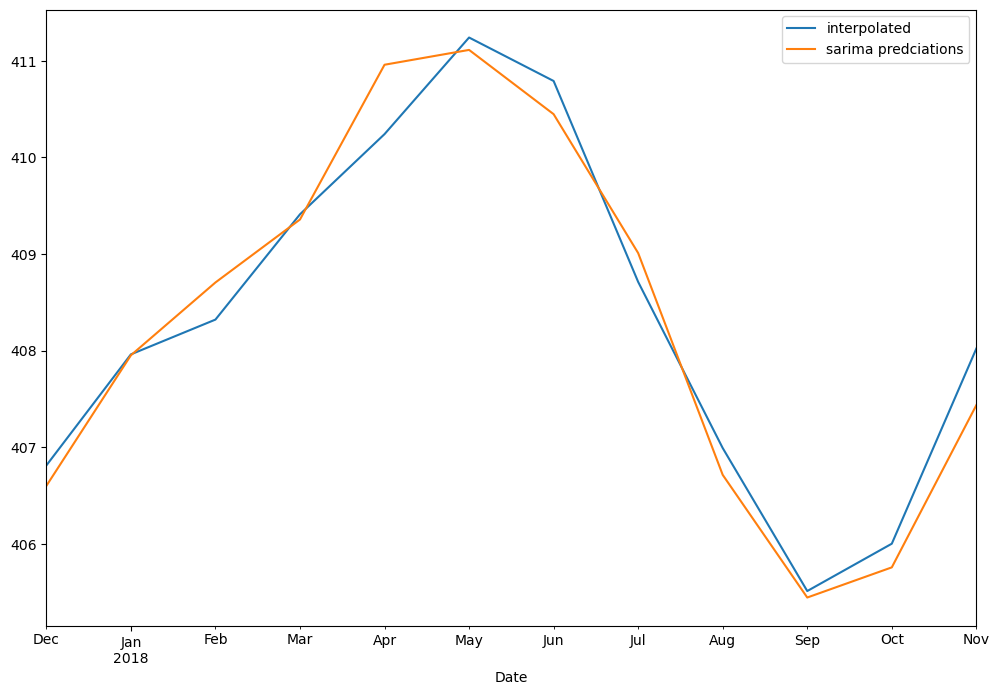

In [40]:
test['interpolated'].plot(legend = True, figsize = (12,8))
predictions.plot(legend = True)

In [41]:
## quite good model


In [42]:
from statsmodels.tools.eval_measures import rmse

In [43]:
error = rmse(test['interpolated'], predictions)

In [44]:
error

0.34390423668871273

In [46]:
test['interpolated'].mean()

408.3333333333333

In [47]:
## retrain model into full data and make future predictions

### forecast into unknown future

In [48]:
model = SARIMAX(df['interpolated'],order = (2,1,1) , seasonal_order = (1,0,1,12))

In [50]:
results = model.fit()

C:\Users\thaku\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [52]:
fcast = results.predict(len(df), len(df)+11, typ = 'levels').rename('SARIMAX Future predictions')

<Axes: xlabel='Date'>

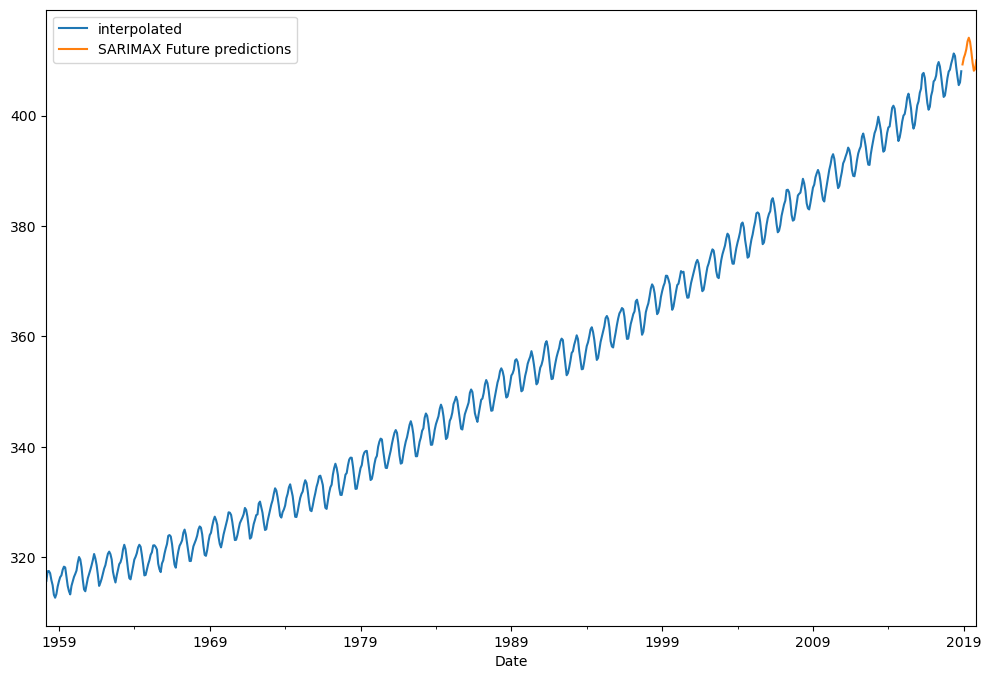

In [54]:
df['interpolated'].plot(legend =True, figsize = (12,8))
fcast.plot(legend = True)